In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


%matplotlib inline

In [31]:
# Two equations describing transcription and translation
# d(mRNA)/dT - rate of change in mRNA
# k_transcription - transcriptin rate (increase in mRNA)
# k_mRNA_degradation - mRNA degradation rate
# mRNA - mRNA concentration

# d(mRNA)/dT = k_transcr -(k_mRNA_degrad * mRNA)
'''
dYmRNA/dT = beta_mRNa - alpha_mRNA * YmRna
'''

# d(Protein)/dT = (k_translation * mRNA) - (k_prot_degrad * Protein)
'''
dYprotein/dT = beta_protein * Ymrna - alpha_protein * Yprotein
'''

'\ndYprotein/dT = beta_protein * Ymrna - alpha_protein * Yprotein\n'

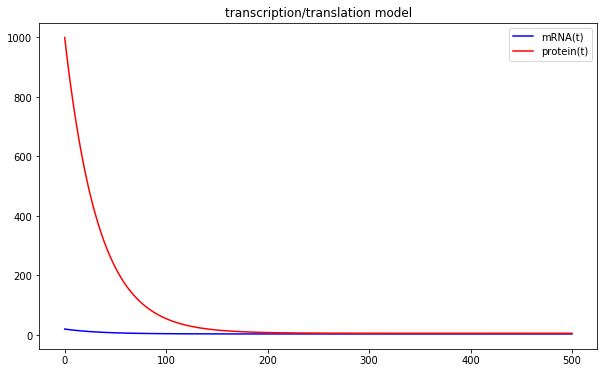

In [53]:
def mRNA_model(y, T, beta_mRNA, beta_protein, alpha_mRNA, alpha_protein, protein):
    YmRNA, Yprotein = y
    dydT = [beta_mRNA-alpha_mRNA*YmRNA, (beta_protein*1/protein*YmRNA)-(alpha_protein*Yprotein)]
    return dydT
beta_mRNA = 0.1
#strong=0.1medium=0.03weak=0.001
beta_protein = 2.85
alpha_mRNA = 0.029
alpha_protein = 0.031
YmRNA = 20
Yprotein = 800
protein = 55
t = np.arange(0, 500, 0.01)
y0 = [20, 1000]
sol = odeint(mRNA_model, y0, t, args=(beta_mRNA, beta_protein, alpha_mRNA, alpha_protein, protein))

# sol
plt.figure(figsize=(10,6)) 

plt.plot(t, sol[:, 0], 'b', label='mRNA(t)')
plt.plot(t, sol[:, 1], 'r', label='protein(t)')

# x1,x2,y1,y2 = plt.axis()
# plt.axis((x1,x2,0,100000))

plt.legend()
plt.title("transcription/translation model")
plt.show()